In [1]:
from MultiLabelEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Load data and convert to Spikes

In [2]:
train_path = '../datasets/yeast/yeast-train.arff'
test_path = '../datasets/yeast/yeast-test.arff'
num_features = 103
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)
test_data = arff.load(open(test_path, 'rt'))
test_data = np.array(test_data['data']).astype(np.float32)
a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 917/917 [00:00<00:00, 9162.65it/s]

Train data shape:  (1500, 1, 618)
Train labels shape:  (1500, 14)
Test data shape:  (917, 1, 618)
Test labels shape:  (917, 14)


## SNN

  0%|          | 0/1000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 2, class 0 neurons = 1
Class 2, class 1 neurons = 2, class 0 neurons = 1
Class 3, class 1 neurons = 2, class 0 neurons = 1
Class 4, class 1 neurons = 2, class 0 neurons = 1
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 2, class 0 neurons = 1
Class 7, class 1 neurons = 2, class 0 neurons = 1
Class 8, class 1 neurons = 2, class 0 neurons = 1
Class 9, class 1 neurons = 3, class 0 neurons = 1
Class 10, class 1 neurons = 2, class 0 neurons = 1
Class 11, class 1 neurons = 1, class 0 neurons = 2
Class 12, class 1 neurons = 1, class 0 neurons = 2


 20%|██        | 200/1000 [2:43:55<10:49:22, 48.70s/it]

Epoch number: 200
Train Precision: 0.8000, Test Precision: 0.7357
Train Recall: 0.5689, Test Recall: 0.5149
Train F1: 0.6649, Test F1: 0.6058
Max. train classwise accuracy for is 0.9353
Min. train classwise accuracy for is 0.6673
Max. test classwise accuracy for is 0.9128
Min. test classwise accuracy for is 0.6096


 40%|████      | 400/1000 [5:26:05<8:05:02, 48.50s/it] 

Epoch number: 400
Train Precision: 0.7592, Test Precision: 0.7129
Train Recall: 0.5577, Test Recall: 0.5188
Train F1: 0.6430, Test F1: 0.6005
Max. train classwise accuracy for is 0.9353
Min. train classwise accuracy for is 0.6620
Max. test classwise accuracy for is 0.9128
Min. test classwise accuracy for is 0.6150


 60%|██████    | 600/1000 [8:07:09<5:21:03, 48.16s/it]

Epoch number: 600
Train Precision: 0.7831, Test Precision: 0.7492
Train Recall: 0.4256, Test Recall: 0.4004
Train F1: 0.5515, Test F1: 0.5219
Max. train classwise accuracy for is 0.9353
Min. train classwise accuracy for is 0.5813
Max. test classwise accuracy for is 0.9128
Min. test classwise accuracy for is 0.5769


 80%|████████  | 800/1000 [10:46:57<2:39:17, 47.79s/it]

Epoch number: 800
Train Precision: 0.8349, Test Precision: 0.7547
Train Recall: 0.1672, Test Recall: 0.1449
Train F1: 0.2786, Test F1: 0.2431
Max. train classwise accuracy for is 0.9353
Min. train classwise accuracy for is 0.3793
Max. test classwise accuracy for is 0.9128
Min. test classwise accuracy for is 0.3664


100%|██████████| 1000/1000 [13:27:17<00:00, 48.44s/it] 

Epoch number: 1000
Train Precision: 0.7706, Test Precision: 0.7378
Train Recall: 0.3469, Test Recall: 0.3273
Train F1: 0.4785, Test F1: 0.4535
Max. train classwise accuracy for is 0.9353
Min. train classwise accuracy for is 0.5813
Max. test classwise accuracy for is 0.9128
Min. test classwise accuracy for is 0.5769
Max. Test Precision: 0.7658 at epoch 905
Test Recall at max. test precision: 0.2954
Test F1 at max. test precision: 0.4264
Train Precision at max. test precision: 0.8002
Train Recall at max. test precision: 0.3167
Train F1 at max. test precision: 0.4538
Max. Test Recall: 0.5955 at epoch 271
Test Precision at max. test recall: 0.6621
Test F1 at max. test recall: 0.6270
Train Recall at max. test recall: 0.6404
Train Precision at max. test recall: 0.7061
Train F1 at max. test recall: 0.6716
Max. Test F1: 0.6491 at epoch 74
Test Recall at max. test F1: 0.5926
Test Precision at max. test F1: 0.7174
Train Recall at max. test F1: 0.6266
Train Precision at max. test F1: 0.7549
Train

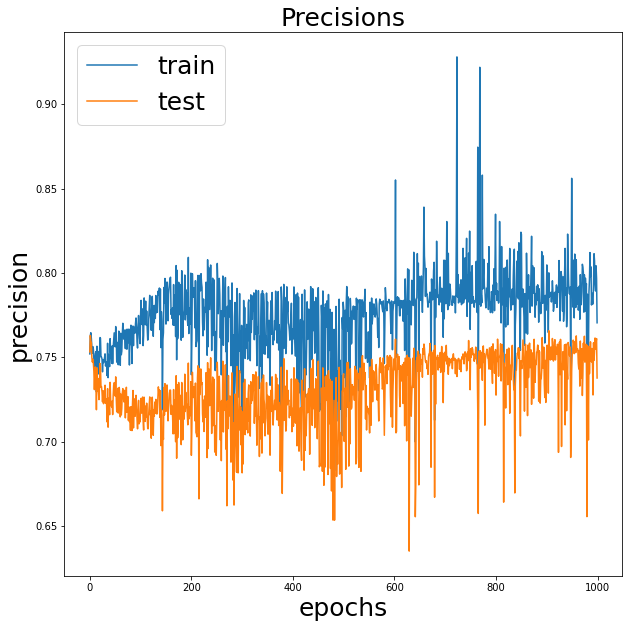

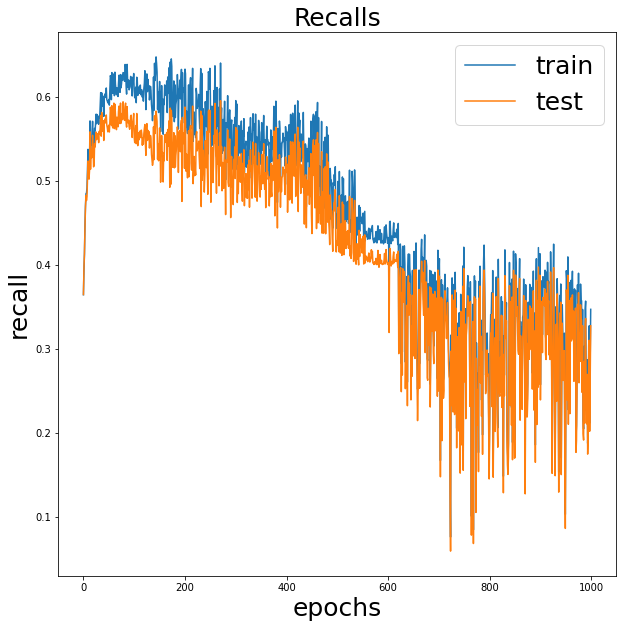

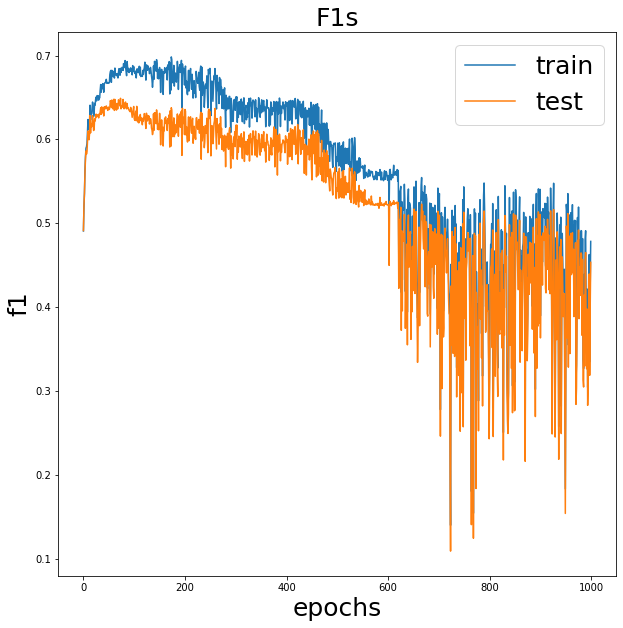

In [3]:
hparams_dict = {
    'inputs': 618,
    'outputs': 13,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 1000,
    'print_every': 200,
    'seed': 2,
    'ckpt_dir': './checkpoints/yeast',
    'load_from_file': None,
    'device': device,
    'name': 'Yeast'
}
net = OverallSNN(hparams_dict)
train_history, test_history = net.fit(train_spikes, train_labels, test_spikes, test_labels)

In [3]:
hparams_dict = {
    'inputs': 618,
    'outputs': 13,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 1000,
    'print_every': 200,
    'seed': 2,
    'ckpt_dir': './checkpoints/yeast',
    'load_from_file': './checkpoints/yeast/best_f1_model0.005_1000.pkl',
    'device': device,
    'name': 'Yeast'
}
net = OverallSNN(hparams_dict)
metrics = Metrics(net, train_spikes, train_labels, test_spikes, test_labels)
metrics.evaluate()

Model was trained on 13 classes
Evaluating Model on train mode
Classwise Results
|                     |        0 |        1 |        2 |        3 |        4 |        5 |        6 |        7 |         8 |         9 |        10 |        11 |        12 |
|:--------------------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|----------:|----------:|----------:|----------:|----------:|
| class               | 1        | 2        | 3        | 4        | 5        | 6        | 7        | 8        | 9         | 10        | 11        | 12        | 13        |
| accuracy            | 0.804    | 0.708    | 0.79     | 0.794    | 0.804667 | 0.796667 | 0.859333 | 0.814667 | 0.934667  |  0.893333 |  0.868    |  0.754667 |  0.747333 |
| hamming loss        | 0.196    | 0.292    | 0.21     | 0.206    | 0.195333 | 0.203333 | 0.140667 | 0.185333 | 0.0653333 |  0.106667 |  0.132    |  0.245333 |  0.252667 |
| zero_one_loss       | 0.196    | 0.292    | 0.21     | 0.